# 什么是图像分类

图像分类的核心任务是从预定义的一组类别中为图像分配标签. 

举个例子:

假设我们预定义了一组类别: `category = {cat, dog, panda}`, 并将下面的图片呈现给图像分类系统

![panda](assets/panda.jpg)

图像分类系统的任务便是将**panda**这个标签分配给这张图片.

而图像分类系统通过输出这组类别的每个标签被分配给图片的概率来完成这个任务, 比如

**dog: 2.5%, cat: 3.5%, panda: 94%**

我们今天的主题正是用程序去实现一个基于深度学习的图像分类系统.

# 一些概念

在开始之前, 我们需要先统一一下认识. 

在进行机器学习和深度学习时, 我们总会对一个**数据集**进行知识的提取. 而**数据集**是由若干**数据点**组成的, 在上述的这个图像分类问题中, 每个数据点就是一张狗, 猫, 或者熊猫的图片. 

有了**数据点**这个概念, 我们再来理解一下什么是分类. 

![datapoint](assets/datapoint.svg)

上图是一个有3个**类别**, 11组**数据点**的**数据集**. 

分类的任务就是通过学习给定的数据集从而找出每种类别在这个数据集空间中的边界, 当得到一个新的, 在数据集中从未出现过的数据点时, 我们能够预测出它所在的标签区域. 

在刚才那个例子中, 每个数据点其实只有两个参数, 即横坐标和纵坐标$(x,y)$. 而在图像分类的问题中, 每个数据点是一张图片, 它并不是一个横纵坐标构成的点, 那它是什么?

在这里我简单介绍一下什么是图像.

## 像素 pixel

相信很多朋友都知道像素是组成图像的最基本元素. 通常我们将像素理解为图像中某个位置的**颜色**或者**光强**. 我们将一张图片想象成一个网格, 那么网格中的一个格子就是一个单独的像素. 网格越大, 图像越清晰. 比如一张图片的网格大小为$800 \times 600 = 480,000$, 我们就说这张图片有48万像素, 其分辨率为$800 \times 600$.

我们经常在相机和拍照手机的宣传中看到诸如"800万像素怎么怎么样"的语句, 其实说的就是拍出来的照片分辨率乘积是800万这个数量级的. 

大多数情况下, 一个像素的表示有两种: 

1. 单通道, 也叫灰度
2. 3通道, RGB彩色

在灰度图片, 也就是黑白图片中, 每个像素是一个0到255之间的值, 其中0对应"黑", 255对应"白", 中间的值代表不同程度的灰色, 越靠近0越深, 反之越浅. 

![grayscale](assets/grayscale.png)

而彩色图片则不同, 每个像素也不再是一个单独的标量值, 而是在RGB空间中的一个向量. 这么说可能有些复杂, 简单来说, 每个像素用3个值来表示, 分别对应红(R), 绿(G), 蓝(B)三个部分, 也叫通道. 每个通道也用0到255之间的一个值来表示其程度. 至于为什么要这么来表示, 因为这三个通道可以组合出非常多种我们能用到的几乎所有颜色.

![add](assets/rgbadd.png)

而且它支持用算数的加法来实现颜色叠加, 计算方便. 

![rgb](assets/rgb.png)

## 图像 image

所以黑白图片其实就是一个$W \times H$的矩阵, 其中$W$是图片的宽而$H$是高, 矩阵中的每个元素$I_{ij} \in [0, 255]$.

类似地, 彩色图片是3个$W \times H$的矩阵叠在一起, 分别表示RGB三个通道上每个像素的值. 这种结构叫**3维张量 (3D-tensor)**.

用张量形式表示的彩色图片就是一个个3维数组, 前两维大小分别是高$H$和宽$W$, 第三维是3, 分别表示每个像素的RGB值.

# 图像分类

回到之前的话题, 我们明白了图像之后就发现一张图片这个数据点并不是由横纵坐标这两个参数来表示的, 而是有$W \times H \times 3$这么多个参数. 那么我们如何进行类似上面的分类呢? 

如果我们能将图像从这么多个参数的表示形态降维到更少一些参数, 是不是会更好做一些? 目前深度学习在图像方面因为**卷积神经网络**的发展能出色地完成这个任务, 而**深度神经网络**又能出色地完成分类问题. 接下来我们就会用这二者来实现我们自己的图像分类系统. 



# 卷积

在进行这一步时, 我们来讲讲, 什么是**卷积**. **卷积**其实只是一个华丽的辞藻, 描述的是一个非常简单的运算操作, 即两个矩阵逐元素相乘, 再求和. 举个例子:

我们有两个矩阵$K, M$: 

![conv0](assets/conv0.svg)

卷积操作为

![conv1](assets/conv2.svg)

在刚才的例子中, 我们用到的两个矩阵维度相同, 都是$3 \times 3$的矩阵. 而卷积操作是可以作用于两个维度大小不同的矩阵的. 其方法就是用小矩阵在大矩阵上从左往右, 从上往下滑动, 每滑动一次就进行一次上面的运算, 结果会得到一个比$M$矩阵稍小的矩阵:

![conv](assets/conv.gif)

我们称小矩阵为本次**卷积**操作的**核(kernel)**, 每次滑动的像素个数为**步长(stride)**. 

另外, 在刚才的例子中我们所使用的对齐(padding)方式称为**有效填充(valid padding)**, 除此之外还有**相同填充(same padding)**. 

**有效填充(valid padding)**指的是在进行卷积时, kernel的范围不会超过原矩阵, 即一个$3\times 3$的kernel作用在$n \times n$的矩阵$M$上时, 实际起点是用kernel的$(2, 2)$元素对齐$M$的$(2, 2)$, 终点是kernel的$(2, 2)$元素对齐$M$的$(n-1, n-1)$. 最终得到的结果矩阵边长为: 
$$
w={(n-k+1)\over{s}}
$$
其中n代表原矩阵边长, k是kernel的边长, s代表步长, 也就是每次滑动前进的像素个数.

而**相同填充(same padding)**指的是kernel的起点是用中心去对准原矩阵的第一个元素, 然后进行滑动, 以原矩阵的最后一个元素为终点. 最终得到的结果矩阵边长为:
$$
w = {n \over s}
$$

![samepadding](assets/samepadding.png)

在理解了什么是**卷积**之后, 我们也需要了解这个卷积操作有什么意义. 

卷积在图像处理上的运用特别多, 我们在P图时其实就已经运用过卷积操作了, 只是我们不知道而已.

假设我们有这么一个kernel:

$
K=\begin{bmatrix}
{1 \over 9}, {1 \over 9}, {1 \over 9} \\
{1 \over 9}, {1 \over 9}, {1 \over 9} \\
{1 \over 9}, {1 \over 9}, {1 \over 9}
\end{bmatrix}
$

用它在一张图像上卷积会是什么效果? 各位可以思考一下, 猜一猜.

In [1]:
def conv(image, kernel, stride=1, padding='valid'):
    from skimage.exposure import rescale_intensity

    n, m = image.shape[:2]
    k = kernel.shape[0]
    pad = (k - 1) // 2
    w, h = (n - k + 1) // stride, (m - k + 1) // stride
    if padding == 'same':
        image = cv2.copyMakeBorder(image, pad, pad, pad, pad, 0)
        w, h = w + 2 * pad // stride, h + 2 * pad // stride
    output = np.zeros((w, h), dtype='float32')
    for y in np.arange(pad, image.shape[0] - pad, stride):
        for x in np.arange(pad, image.shape[1] - pad, stride):
            batch = image[y - pad: y + pad + 1, x - pad: x + pad + 1]
            convolve = (kernel * batch).sum()
            output[(y - pad) // stride, (x - pad) // stride] = convolve
    output = rescale_intensity(output, in_range=(0, 255))
    return (output * 255).astype('uint8')

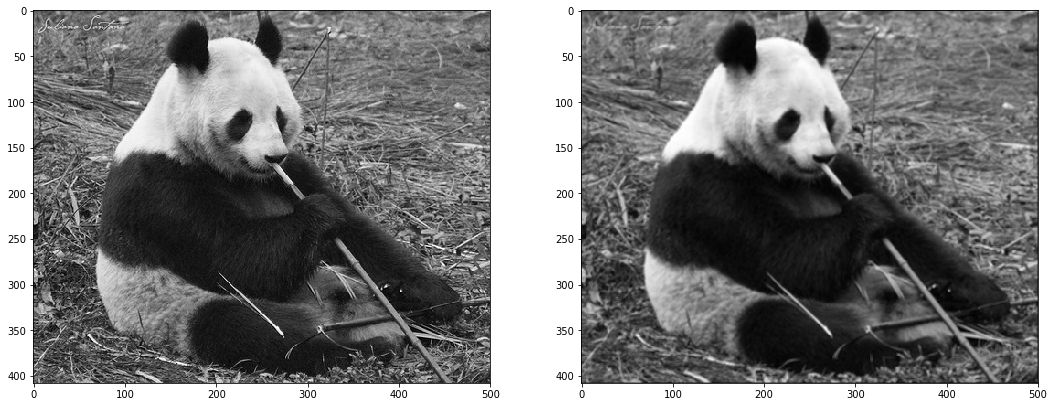

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image = cv2.imread('assets/panda.jpg')[:, :, 0]

kernel_size = 3
kernel = np.ones(shape=(kernel_size, kernel_size)) / kernel_size ** 2
out = conv(image, kernel, stride=1, padding='same')
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')

我们发现这个核的功能实际上是对原图进行模糊处理. 再来看看其他几个核:

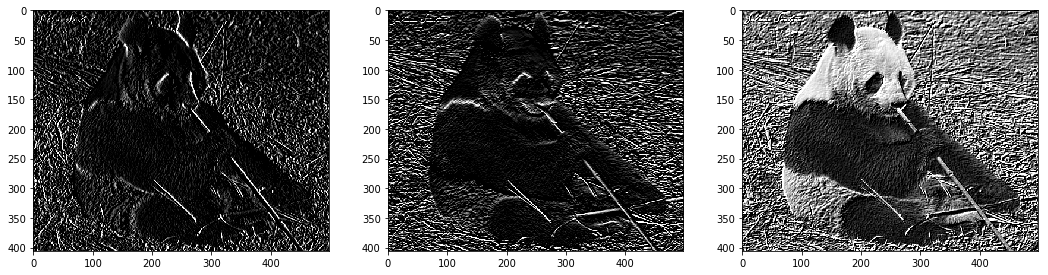

In [8]:
kernel1 = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])
kernel2 = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])
kernel3 = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
])
out1 = conv(image, kernel1)
out2 = conv(image, kernel2)
out3 = conv(image, kernel3)

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
plt.imshow(out1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(out2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(out3, cmap='gray')

可见用不同的kernel来卷积可以使得原图像呈现各种各样的效果, 换句话说, 它将图像的某种特征凸显了出来.